## Common Imports

In [1]:
import pandas as pd
import numpy as np

## Load data

In [2]:
eval_data_formatted = pd.read_pickle('pickle_files/eval_data_formatted.pickle') #raw evaluation data for referencing
eval_data_formatted['Tweet ID'] = eval_data_formatted['Tweet ID'].astype(str) #set tweet id type as string
class_results_local = pd.read_pickle('results/preds_per_tweet_local.pickle') #tweet by tweet classifications per model local
class_results_colab = pd.read_pickle('results/preds_per_tweet_colab.pickle') #tweet by tweet classifications per model colab
class_results = class_results_local.append(class_results_colab)
metrics_local = pd.read_pickle('results/metrics_local.pickle') #overall metrics per model local
metrics_colab = pd.read_pickle('results/metrics_colab.pickle') #overall metrics per model colab
metrics = metrics_local.append(metrics_colab)
actual = pd.read_pickle('features/df_tweet_eval.pickle') #get the actual classifications per tweet
actual_class = actual.loc[:,['tweet_id','class_column']] #get the actual classifications per tweet

C:\Users\scott\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [3]:
add_info = pd.read_csv('add_info.csv', encoding='latin')
metrics = pd.merge(metrics, add_info, on='tf')

In [4]:
metrics.to_csv('metrics.csv')
class_results.to_csv('class_results.csv')

In [5]:
class_results['desc'] = class_results['model']+ ' model using '+class_results['file']
class_results_pivot = class_results.pivot(index='tweet_id',columns='desc',values='pred').reset_index()
class_results.to_csv('class_results.csv')

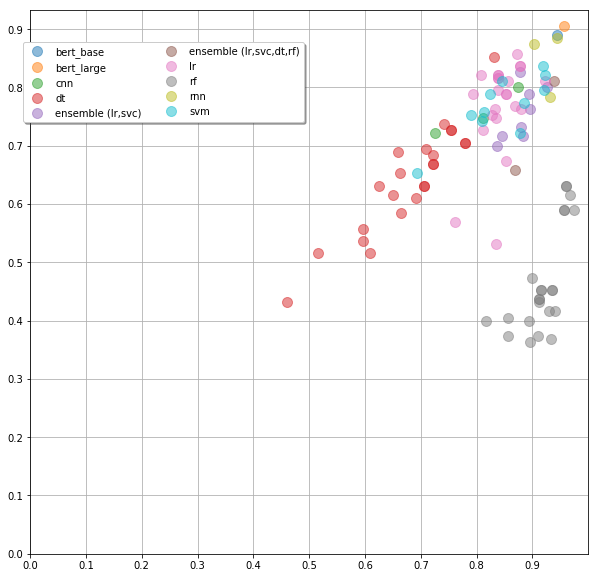

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_data = metrics.copy()

# Generate Data
p = plot_data.p
r = plot_data.r
groups = metrics.groupby('name')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.p, group.r, marker='o', linestyle='', ms=10, label=name, alpha=0.5)
ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.95),
          ncol=2, fancybox=True, shadow=True)
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.grid()
plt.show()

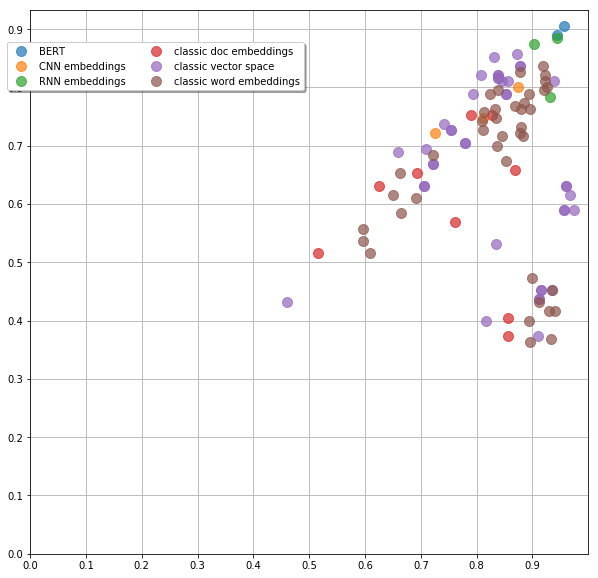

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_data = metrics.copy()

#plot_data = plot_data[plot_data.calc!='n/a']

# Generate Data
p = plot_data.p
r = plot_data.r
groups = metrics.groupby('group')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.p, group.r, marker='o', linestyle='', ms=10, label=name, alpha=0.7)
ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.95),
          ncol=2, fancybox=True, shadow=True)
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.grid()
plt.show()

In [11]:
metrics.columns

Index(['Unnamed: 0', 'acc', 'auc_sc', 'bp', 'f_1', 'fn', 'fp', 'name', 'p',
       'r', 'tf', 'tn', 'tp', 'group', 'features', 'calc', 'Unnamed: 4'],
      dtype='object')

Text(0.5,0,'')

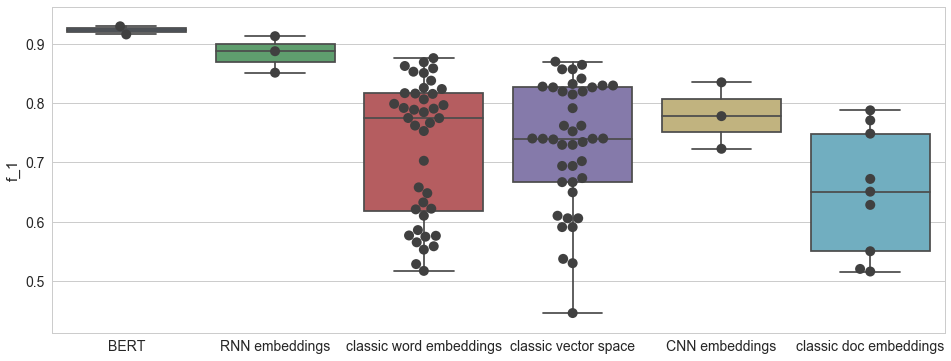

In [12]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(16, 6))

group_field = 'group'
metric_field = 'f_1'
plot_data = metrics.copy()

x = plot_data.groupby([group_field], sort=True)[metric_field].max().reset_index()
x = x.sort_values(by=metric_field, ascending=False)


sort = x[group_field]
ax = sns.boxplot(x=group_field, y=metric_field, data=plot_data, order=sort)
ax = sns.swarmplot(x=group_field, y=metric_field, data=plot_data, color=".25", order=sort, size=10)
ax.set_xlabel('')

Text(0.5,0,'')

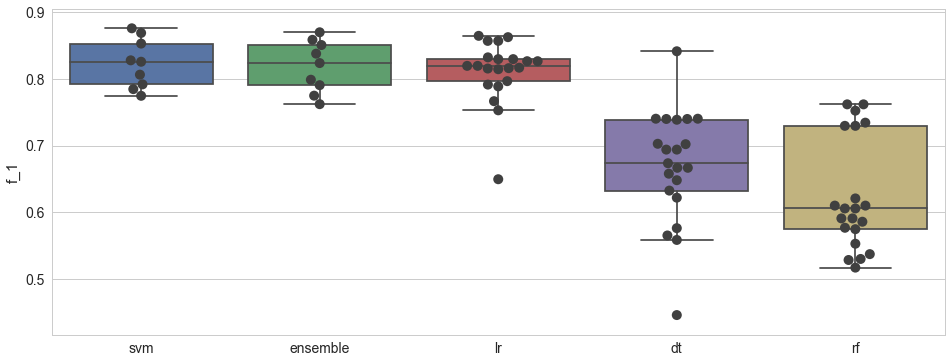

In [13]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(16, 6))

group_field = 'name'
metric_field = 'f_1'
plot_data = metrics[metrics['group'].isin(['classic vector space','classic word embeddings'])]
update = {'ensemble (lr,svc,dt,rf)':'ensemble','ensemble (lr,svc)':'ensemble'}
plot_data = plot_data.replace({"name": update})

x = plot_data.groupby([group_field], sort=True)[metric_field].max().reset_index()
x = x.sort_values(by=metric_field, ascending=False)


sort = x[group_field]
ax = sns.boxplot(x=group_field, y=metric_field, data=plot_data, order=sort)
ax = sns.swarmplot(x=group_field, y=metric_field, data=plot_data, color=".25", order=sort, size=10)
ax.set_xlabel('')

Text(0.5,0,'')

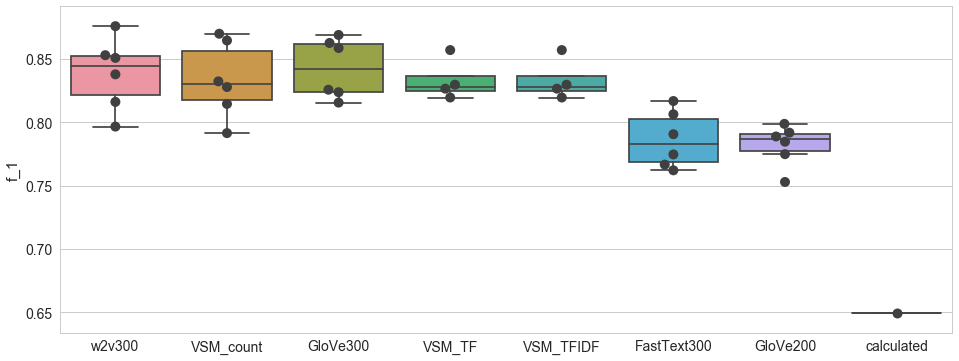

In [14]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(16, 6))

group_field = 'features'
metric_field = 'f_1'
plot_data = metrics[metrics['group'].isin(['classic vector space','classic word embeddings'])]
plot_data = plot_data[~plot_data['name'].isin(['rf','dt'])]
update = {'ensemble (lr,svc,dt,rf)':'ensemble','ensemble (lr,svc)':'ensemble'}
plot_data = plot_data.replace({"name": update})

x = plot_data.groupby([group_field], sort=True)[metric_field].max().reset_index()
x = x.sort_values(by=metric_field, ascending=False)


sort = x[group_field]
ax = sns.boxplot(x=group_field, y=metric_field, data=plot_data, order=sort)
ax = sns.swarmplot(x=group_field, y=metric_field, data=plot_data, color=".25", order=sort, size=10)
ax.set_xlabel('')

In [15]:
plot_data = metrics[metrics['group'].isin(['classic vector space','classic word embeddings'])]
plot_data = plot_data[~plot_data['name'].isin(['lr','dt'])]
plot_data

,Unnamed: 0,acc,auc_sc,bp,f_1,fn,fp,name,p,r,tf,tn,tp,group,features,calc,Unnamed: 4
2,NaN,0.926543,0.812781,criterion gini;random_state 42,0.761905,70.0,5.0,rf,0.960000,0.631579,features/df_tweet_tfidf_train.pickle,826.0,120.0,classic vector space,VSM_TFIDF,y,NaN
5,NaN,0.926543,0.812781,criterion gini;random_state 42,0.761905,70.0,5.0,rf,0.960000,0.631579,features/df_tweet_tf_train.pickle,826.0,120.0,classic vector space,VSM_TF,y,NaN
8,NaN,0.924584,0.805488,criterion gini;random_state 42,0.752412,73.0,4.0,rf,0.966942,0.615789,features/df_tweet_train.pickle,827.0,117.0,classic vector space,VSM_count,y,NaN
9,NaN,0.937316,0.888416,C 0.05;kernel linear;random_state 42,0.827957,36.0,28.0,svm,0.846154,0.810526,features/df_tweet_train.pickle,803.0,154.0,classic vector space,VSM_count,y,NaN
10,NaN,0.954946,0.899246,ensemble,0.870056,36.0,10.0,"ensemble (lr,svc,dt,rf)",0.939024,0.810526,features/df_tweet_train.pickle,821.0,154.0,classic vector space,VSM_count,y,NaN
13,NaN,0.890304,0.721502,criterion gini;random_state 42,0.605634,104.0,8.0,rf,0.914894,0.452632,features/df_tweetbio_tfidf_train.pickle,823.0,86.0,classic vector space,VSM_TFIDF,y,NaN
16,NaN,0.890304,0.721502,criterion gini;random_state 42,0.605634,104.0,8.0,rf,0.914894,0.452632,features/df_tweetbio_tf_train.pickle,823.0,86.0,classic vector space,VSM_TF,y,NaN
19,NaN,0.892262,0.722706,criterion entropy;random_state 42,0.609929,104.0,6.0,rf,0.934783,0.452632,features/df_tweetbio_train.pickle,825.0,86.0,classic vector space,VSM_count,y,NaN
22,NaN,0.918707,0.791728,criterion gini;random_state 42,0.729642,78.0,5.0,rf,0.957265,0.589474,features/df_tweet_tfidf_train_nc.pickle,826.0,112.0,classic vector space,VSM_TFIDF,n,NaN
25,NaN,0.918707,0.791728,criterion gini;random_state 42,0.729642,78.0,5.0,rf,0.957265,0.589474,features/df_tweet_tf_train_nc.pickle,826.0,112.0,classic vector space,VSM_TF,n,NaN


In [16]:
plot_data = metrics[metrics['group'].isin(['classic vector space','classic word embeddings'])]
plot_data['name'].isin(['lr','dt'])

0      True
1      True
2     False
3      True
4      True
      ...  
93     True
94     True
95    False
96    False
97    False
Name: name, Length: 81, dtype: bool

Text(0.5,0,'')

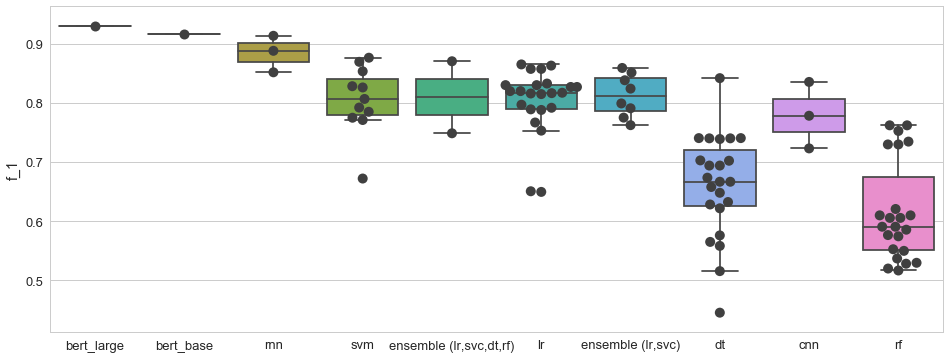

In [17]:
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(16, 6))

group_field = 'name'
metric_field = 'f_1'
x = metrics.groupby([group_field], sort=True)[metric_field].max().reset_index()
x = x.sort_values(by=metric_field, ascending=False)


sort = x[group_field]
ax = sns.boxplot(x=group_field, y=metric_field, data=metrics, order=sort)
ax = sns.swarmplot(x=group_field, y=metric_field, data=metrics, color=".25", order=sort, size=10)
ax.set_xlabel('')

In [18]:
x

,name,f_1
1,bert_large,0.929730
0,bert_base,0.915989
8,rnn,0.913043
9,svm,0.876033
5,"ensemble (lr,svc,dt,rf)",0.870056
6,lr,0.864721
4,"ensemble (lr,svc)",0.858757
3,dt,0.841558
2,cnn,0.835165
7,rf,0.761905


Text(0,0.5,'recall')

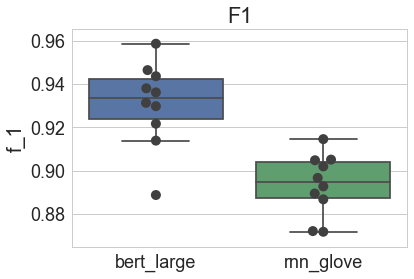

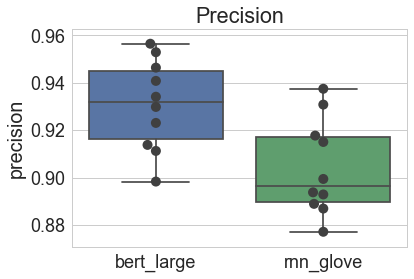

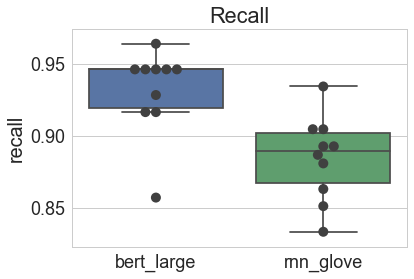

In [19]:
compare = pd.read_pickle('results/compare.pickle') #comparison data
group_field = 'name'

sns.set(style="whitegrid", font_scale=1.8)

fig, ax = plt.subplots()
metric_field = 'f_1'
x = compare.groupby([group_field], sort=True)[metric_field].max().reset_index()
x = x.sort_values(by=metric_field, ascending=False)
sort = x[group_field]
ax = sns.boxplot(x=group_field, y=metric_field, data=compare, order=sort)
ax = sns.swarmplot(x=group_field, y=metric_field, data=compare, color=".25", order=sort, size=10)
ax.set_title('F1')
ax.set_xlabel('')

fig, ax = plt.subplots()
metric_field = 'p'
x = compare.groupby([group_field], sort=True)[metric_field].max().reset_index()
x = x.sort_values(by=metric_field, ascending=False)
sort = x[group_field]
ax = sns.boxplot(x=group_field, y=metric_field, data=compare, order=sort)
ax = sns.swarmplot(x=group_field, y=metric_field, data=compare, color=".25", order=sort, size=10)
ax.set_title('Precision')
ax.set_xlabel('')
ax.set_ylabel('precision')

fig, ax = plt.subplots()
metric_field = 'r'
x = compare.groupby([group_field], sort=True)[metric_field].max().reset_index()
x = x.sort_values(by=metric_field, ascending=False)
sort = x[group_field]
ax = sns.boxplot(x=group_field, y=metric_field, data=compare, order=sort)
ax = sns.swarmplot(x=group_field, y=metric_field, data=compare, color=".25", order=sort, size=10)
ax.set_title('Recall')
ax.set_xlabel('')
ax.set_ylabel('recall')

In [20]:
from scipy import stats


x = compare.f_1[compare['name']=='bert_large'].values
y = compare.f_1[compare['name']=='rnn_glove'].values
print('bert large shapiro p-value = ',stats.shapiro(x))
print('rnn glove shapiro p-value = ',stats.shapiro(y))
stats.shapiro(y)

test = stats.wilcoxon(x, y)

print('f1 p-value = ',test[1])

x = compare.p[compare['name']=='bert_large'].values
y = compare.p[compare['name']=='rnn_glove'].values
print('bert large shapiro p-value = ',stats.shapiro(x))
print('rnn glove shapiro p-value = ',stats.shapiro(y))
test = stats.wilcoxon(x, y)
print('precision p-value = ',test[1])

x = compare.r[compare['name']=='bert_large'].values
y = compare.r[compare['name']=='rnn_glove'].values
print('bert large shapiro p-value = ',stats.shapiro(x))
print('rnn glove shapiro p-value = ',stats.shapiro(y))
test = stats.wilcoxon(x, y)
print('recall p-value = ',test[1])

bert large shapiro p-value =  (0.9449561834335327, 0.609355092048645)
rnn glove shapiro p-value =  (0.9428675174713135, 0.5853402614593506)
f1 p-value =  0.005062032126267864
bert large shapiro p-value =  (0.9673488140106201, 0.865235447883606)
rnn glove shapiro p-value =  (0.9299729466438293, 0.4476264417171478)
precision p-value =  0.009344113002204883
bert large shapiro p-value =  (0.7803781032562256, 0.008366923779249191)
rnn glove shapiro p-value =  (0.9715794920921326, 0.9050910472869873)
recall p-value =  0.005005074402905223


In [83]:
stats.shapiro(x)

(0.7803781032562256, 0.008366923779249191)

In [46]:
x = compare.f_1[compare['name']=='bert_large'].values
y = compare.f_1[compare['name']=='rnn_glove'].values
x

array([0.95857988, 0.91394659, 0.88888889, 0.93617021, 0.94362018,
       0.92982456, 0.92173913, 0.94642857, 0.9380531 , 0.93134328])

In [42]:
compare

,Unnamed: 0,model_run,name,tn,fp,fn,tp,p,r,f_1,auc_sc,acc
0,0,0.0,bert_large,845.0,8.0,6.0,162.0,0.952941,0.964286,0.958580,0.977454,0.986288
1,1,1.0,bert_large,838.0,15.0,14.0,154.0,0.911243,0.916667,0.913947,0.949541,0.971596
2,2,2.0,bert_large,841.0,12.0,24.0,144.0,0.923077,0.857143,0.888889,0.921537,0.964740
3,3,3.0,bert_large,846.0,7.0,14.0,154.0,0.956522,0.916667,0.936170,0.954230,0.979432
4,4,4.0,bert_large,843.0,10.0,9.0,159.0,0.940828,0.946429,0.943620,0.967353,0.981391
5,5,5.0,bert_large,838.0,15.0,9.0,159.0,0.913793,0.946429,0.929825,0.964422,0.976494
6,6,6.0,bert_large,835.0,18.0,9.0,159.0,0.898305,0.946429,0.921739,0.962663,0.973555
7,7,7.0,bert_large,844.0,9.0,9.0,159.0,0.946429,0.946429,0.946429,0.967939,0.982370
8,8,8.0,bert_large,841.0,12.0,9.0,159.0,0.929825,0.946429,0.938053,0.966180,0.979432
9,9,9.0,bert_large,842.0,11.0,12.0,156.0,0.934132,0.928571,0.931343,0.957838,0.977473


## Counts of positives and negatives per tweet

In [15]:
df_check = class_results_pivot.copy() #copy the detailed results
model_counts = len(df_check.columns)-1 #count the total number of models in df_check
df_check['count_positive'] = df_check.sum(axis=1) #create a column counting the number of positives
df_check = pd.merge(df_check, actual_class, on='tweet_id') #merge the actual class for each tweet
df_check = df_check.loc[:,['tweet_id','count_positive','class_column']]   #create dataframe with the actual class and the
df_check['count_negative'] = model_counts - df_check['count_positive']    #counts of positive and negative predictions per tweet

In [17]:
t_id = [] #array to hold tweet ids
tweet = [] #array to hold tweet texts
desc = [] #classifier and feature combo
count = [] #number of classifier/feature combos classifying correctly
t = [] #the type of correct classification

for n in range(0,10): #n is the number of classifier/feature combos that got the right classification
    tweet_list = df_check[(df_check.count_negative==n)&(df_check.class_column==0)].tweet_id #negative class 
    if n==0:                                                                                #tweets with n negative 
        if (len(tweet_list)>0): #if there are tweets without correct classification         #correct classifiers
            t_id = np.append(t_id,tweet_list) #append tweet ids
            tweet = np.append(tweet,eval_data_formatted[eval_data_formatted['Tweet ID'].isin(tweet_list)].Tweet) #append tweet text
            desc = np.append(desc,np.repeat('no models',len(tweet_list))) #append classifier and feature combo description
            count = np.append(count,np.repeat(n,len(tweet_list))) #append number of classifier/feature combos classifying correctly
            t = np.append(t,np.repeat('tn',len(tweet_list))) #append the type of correct classification
    else:
        for tw_id in tweet_list: #go through each tweet id
            t_id = np.append(t_id,np.repeat(tw_id,n)) #append tweet id
            tweet = np.append(tweet,np.repeat(eval_data_formatted[eval_data_formatted['Tweet ID']==tw_id].Tweet,n)) #tweet text
            desc = np.append(desc,class_results[(class_results.pred==0)&(class_results.tweet_id==tw_id)].desc) #classifier/feature combo
            count = np.append(count,np.repeat(n,n)) #append number of classifier/feature combos classifying correctly
            t = np.append(t,np.repeat('tn',n)) #append the type of correct classification
            
            
    tweet_list = df_check[(df_check.count_positive==n)&(df_check.class_column==1)].tweet_id #positive class
    if n==0:                                                                                #tweets with n negative 
        if (len(tweet_list)>0): #if there are tweets without correct classification         #correct classifiers
            t_id = np.append(t_id,tweet_list) #append tweet ids
            tweet = np.append(tweet,eval_data_formatted[eval_data_formatted['Tweet ID'].isin(tweet_list)].Tweet) #append tweet text
            desc = np.append(desc,np.repeat('no models',len(tweet_list))) #append classifier and feature combo description
            count = np.append(count,np.repeat(n,len(tweet_list))) #append number of classifier/feature combos classifying correctly
            t = np.append(t,np.repeat('tp',len(tweet_list))) #append the type of correct classification
    else:
        for tw_id in tweet_list: #go through each tweet id
            t_id = np.append(t_id,np.repeat(tw_id,n)) #append tweet id
            tweet = np.append(tweet,np.repeat(eval_data_formatted[eval_data_formatted['Tweet ID']==tw_id].Tweet,n)) #tweet text
            desc = np.append(desc,class_results[(class_results.pred==1)&(class_results.tweet_id==tw_id)].desc) #classifier/feature combo
            count = np.append(count,np.repeat(n,n)) #append number of classifier/feature combos classifying correctly
            t = np.append(t,np.repeat('tp',n)) #append the type of correct classification            
            
            
print(len(t_id))
print(len(tweet))
print(len(desc))
print(len(count))
print(len(t))

44
44
44
44
44


In [8]:

#Set the display.max_colwidth option to -1:

pd.options.display.max_colwidth = 280
df = pd.DataFrame({'t_id':t_id,'tweet':tweet,'desc':desc,'count':count,'t':t})
df

,t_id,tweet,desc,count,t
0,888118576573325312,This may be a blessing in disguise. I'm enjoying all this Sturgeon news in the mean time. The Scottish dwarf an…,dt model using features/df_tweet_eval_nc.pickle,2.0,tp
1,888118576573325312,This may be a blessing in disguise. I'm enjoying all this Sturgeon news in the mean time. The Scottish dwarf an…,cnn_glove300 model using eval_data_formatted.pickle,2.0,tp
2,910247211031781376,"As Andrew Neil steps down from his Sunday Politics role, a reminder of the time he called Sturgeon a 'Tipsy Scotch Tart'. htt…",dt model using features/df_tweet_count_features_eval.pickle,2.0,tp
3,910247211031781376,"As Andrew Neil steps down from his Sunday Politics role, a reminder of the time he called Sturgeon a 'Tipsy Scotch Tart'. htt…",dt model using fasttext_300_sum_plusCounts,2.0,tp
4,1153765869761302529,Nicola sturgeon has a face I would punch,lr model using features/df_tweet_count_features_eval.pickle,3.0,tn
5,1153765869761302529,Nicola sturgeon has a face I would punch,dt model using features/df_tweet_count_features_eval.pickle,3.0,tn
6,1153765869761302529,Nicola sturgeon has a face I would punch,rf model using w2v_300_sum,3.0,tn


In [9]:
#negative class tweets where all classifiers were correct
df_check[(df_check.count_negative==model_counts)&(df_check.class_column==0)].tweet_id

0      1146950933437399040
2      1147011915782217729
7      1147105421477519360
8      1147126096934125568
9      1147151158869291009
              ...         
825    1157974240106352640
827    1157974330657169408
828    1157974611818102784
829    1157974810833686529
830    1157974989318033415
Name: tweet_id, Length: 365, dtype: object

In [12]:
#positive class tweets where all classifiers were correct
df_check[(df_check.count_positive==model_counts-2)&(df_check.class_column==1)].tweet_id

841     839520775027699713
883     842483329576435712
987     902473790403248128
1013    906431625009025024
Name: tweet_id, dtype: object